# Recommender System
## Cloth brand recommendation to user based on their rating

Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd

C:\Users\Manikandan Muthiah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
columns=['item_id','user_id','rating','timestamp','size','fit','user_attr','model_attr','category','brand','year','split']
df=pd.read_csv('C://Users//Manikandan Muthiah//Downloads//modcloth.csv',sep=',',names=columns,skiprows=1)

In [3]:
df.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


## Exploratory Data analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

C:\Users\Manikandan Muthiah\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
item_brand_cnt=pd.DataFrame(df.groupby('item_id')['brand'].count().sort_values(ascending=False))

In [6]:
item_brand_cnt[item_brand_cnt['brand']>1]

,brand
item_id,
21296,1636
70538,1045
107539,975
40899,957
59176,933
...,...
151978,2
152173,2
152205,2


In [7]:
df.groupby('brand')['rating'].mean().sort_values(ascending=False).head()

brand
Daisey Natives    4.741379
Kin Ship          4.671088
Out of Print      4.598415
Pink Martini      4.524476
Eliza J           4.500000
Name: rating, dtype: float64

In [8]:
df.groupby('brand')['rating'].count().sort_values(ascending=False).head()

brand
ModCloth          15071
Chi Chi London     2940
Retrolicious       1951
Steve Madden       1222
Out of Print        757
Name: rating, dtype: int64

In [9]:
ratings=pd.DataFrame(df.groupby('brand')['rating'].mean())
ratings.head()

,rating
brand,
Alice's Pig,3.960000
BB Dakota,4.250000
Banned,4.073529
Blue Platypus,4.000000
Chi Chi London,4.199660


In [10]:
ratings['num_of_ratings']=pd.DataFrame(df.groupby('brand')['rating'].count())
ratings.head()

,rating,num_of_ratings
brand,,
Alice's Pig,3.960000,25
BB Dakota,4.250000,16
Banned,4.073529,408
Blue Platypus,4.000000,6
Chi Chi London,4.199660,2940


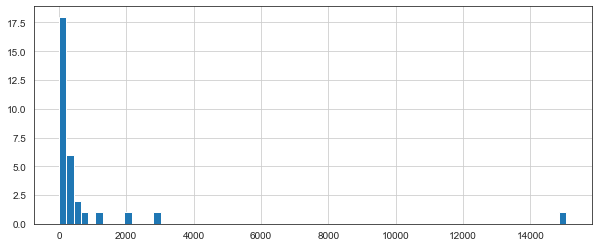

In [11]:
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=70)

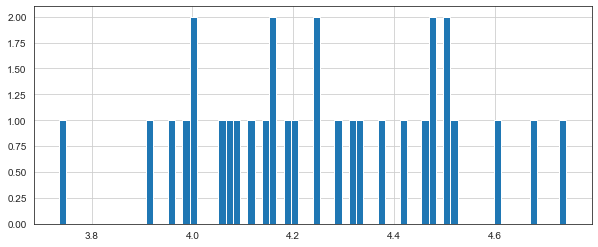

In [12]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

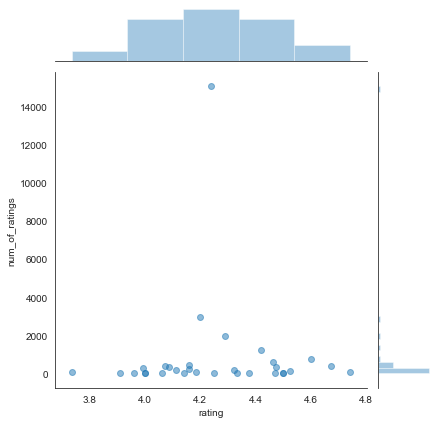

In [13]:
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha=0.5)

## Recommending clothes

In [14]:
clothmat=df.pivot_table(index='user_id',columns='brand',values='rating')
clothmat.head()

brand,Alice's Pig,BB Dakota,Banned,Blue Platypus,Chi Chi London,Closet London,Collectif,Compania Fantastica,Daisey Natives,Effie's Heart,...,Pepaloves,Pink Martini,Retrolicious,Rolla's,Ryu,Steve Madden,Sugarhill Boutique,Wendy Bird,Wrangler,Yumi
user_id,,,,,,,,,,,,,,,,,,,,,
"""Ferrari"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#1dad,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Chelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings.sort_values('num_of_ratings',ascending=False).head(10)

,rating,num_of_ratings
brand,,
ModCloth,4.240462,15071
Chi Chi London,4.199660,2940
Retrolicious,4.289595,1951
Steve Madden,4.419804,1222
Out of Print,4.598415,757
Ryu,4.462437,599
Emily and Fin,4.159551,445
Banned,4.073529,408
Kin Ship,4.671088,377


In [16]:
modcloth_user_rating=clothmat['ModCloth']
modcloth_user_rating.head()

user_id
"Ferrari")    3.0
#             5.0
#1dad         NaN
'Chelle       3.5
-L            5.0
Name: ModCloth, dtype: float64

In [17]:
stevemadden_user_rating=clothmat['Steve Madden']
stevemadden_user_rating.head()

user_id
"Ferrari")   NaN
#            NaN
#1dad        NaN
'Chelle      NaN
-L           NaN
Name: Steve Madden, dtype: float64

In [18]:
similar_to_modcloth=clothmat.corrwith(modcloth_user_rating)
similar_to_steve=clothmat.corrwith(stevemadden_user_rating)

C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [19]:
corr_modcloth=pd.DataFrame(similar_to_modcloth,columns=['Correlation'])
corr_modcloth.dropna(inplace=True)
corr_modcloth.head()

,Correlation
brand,
Alice's Pig,0.497579
BB Dakota,-0.086454
Banned,0.216650
Chi Chi London,0.086872
Closet London,-0.008529


In [20]:
corr_steve=pd.DataFrame(similar_to_steve,columns=['Correlation'])
corr_steve.dropna(inplace=True)
corr_steve.head()

,Correlation
brand,
Alice's Pig,0.404226
BB Dakota,-0.036370
Banned,0.212140
Chi Chi London,0.029829
Collectif,-0.133013


In [21]:
corr_modcloth.sort_values('Correlation',ascending=False).head(10)

,Correlation
brand,
ModCloth,1.000000
Miss Patina,0.524441
Alice's Pig,0.497579
Mata Traders,0.489539
Jack by BB Dakota,0.233652
Yumi,0.225773
Banned,0.216650
Collectif,0.208635
Out of Print,0.193322


In [22]:
corr_steve.sort_values('Correlation',ascending=False).head(10)

,Correlation
brand,
Steve Madden,1.000000
Yumi,1.000000
Mata Traders,0.707107
Alice's Pig,0.404226
Miss Patina,0.395815
Compania Fantastica,0.363305
Pepaloves,0.216632
Banned,0.212140
Sugarhill Boutique,0.210992


In [23]:
corr_modcloth=corr_modcloth.join(ratings['num_of_ratings'])
corr_modcloth.head()

,Correlation,num_of_ratings
brand,,
Alice's Pig,0.497579,25
BB Dakota,-0.086454,16
Banned,0.216650,408
Chi Chi London,0.086872,2940
Closet London,-0.008529,12


In [24]:
corr_modcloth[corr_modcloth['num_of_ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
brand,,
ModCloth,1.000000,15071
Jack by BB Dakota,0.233652,355
Banned,0.216650,408
Collectif,0.208635,286
Out of Print,0.193322,757


In [25]:
corr_steve=corr_steve.join(ratings['num_of_ratings'])

In [26]:
corr_steve[corr_steve['num_of_ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
brand,,
Steve Madden,1.000000,1222
Compania Fantastica,0.363305,87
Pepaloves,0.216632,208
Banned,0.212140,408
Sugarhill Boutique,0.210992,65


In [27]:
df.brand.nunique(dropna = True)

31

In [28]:
df.brand.unique()

array([nan, 'ModCloth', 'Retrolicious', 'Steve Madden', 'Ryu',
       'Chi Chi London', 'Out of Print', 'Kin Ship', 'Jack by BB Dakota',
       'Pink Martini', 'Miss Candyfloss', 'Emily and Fin',
       'Daisey Natives', 'Hell Bunny', 'Banned', 'Sugarhill Boutique',
       'Wrangler', 'Wendy Bird', 'Pepaloves', 'Collectif',
       'Compania Fantastica', 'Closet London', 'Eliza J', 'BB Dakota',
       "Alice's Pig", 'Louche', "Effie's Heart", 'Miss Patina',
       'Mata Traders', "Rolla's", 'Yumi', 'Blue Platypus'], dtype=object)

In [29]:
london_user_rating=clothmat['Chi Chi London']
similar_to_london=clothmat.corrwith(london_user_rating)
corr_london=pd.DataFrame(similar_to_london,columns=['Correlation'])
corr_london.dropna(inplace=True)
corr_london=corr_london.join(ratings['num_of_ratings'])
corr_london[corr_london['num_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
brand,,
Chi Chi London,1.000000,2940
Out of Print,0.137869,757
Emily and Fin,0.126662,445
ModCloth,0.086872,15071
Pepaloves,0.077070,208


In [30]:
corr_london.sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
brand,,
Chi Chi London,1.000000,2940
Eliza J,0.409644,8
Wendy Bird,0.327327,9
Miss Patina,0.229330,49
Out of Print,0.137869,757


In [31]:
corr_london[corr_london['num_of_ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
brand,,
Chi Chi London,1.000000,2940
Out of Print,0.137869,757
Emily and Fin,0.126662,445
ModCloth,0.086872,15071
Pepaloves,0.077070,208


In [32]:
Yumi_user_rating=clothmat['Yumi']
similar_to_Yumi=clothmat.corrwith(Yumi_user_rating)
corr_Yumi=pd.DataFrame(similar_to_Yumi,columns=['Correlation'])
corr_Yumi.dropna(inplace=True)
corr_Yumi=corr_Yumi.join(ratings['num_of_ratings'])
corr_Yumi.sort_values('Correlation',ascending=False).head()

C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Manikandan Muthiah\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num_of_ratings
brand,,
Yumi,1.0,16
Retrolicious,1.0,1951
Steve Madden,1.0,1222
Banned,0.5,408
Pepaloves,0.5,208


In [33]:
corr_Yumi[corr_Yumi['num_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
brand,,
Retrolicious,1.000000,1951
Steve Madden,1.000000,1222
Banned,0.500000,408
Pepaloves,0.500000,208
ModCloth,0.225773,15071


# Thank you